Project Summary
1)Business Case:
INX Future Inc ,(referred as INX ) , is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. In recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. There has been increased escalations on service delivery and client satisfaction levels came down by 8 percentage points.The CEO of company decided to analyse the current employee data and find the core underlying causes of this performance issues of the employees. Company also expects a clear indicators of non performing employees, so that any penalization of non-performing employee, if required, may not significantly affect other employee morals.

The following insights are expected from this project.

Department wise performances
Top 3 Important Factors effecting employee performance
A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees
Recommendations to improve the employee performance based on insights from analysis

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading Dataset
data=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data.xls')
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [7]:
data.tail()

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [9]:
data.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [10]:
data.describe(include='O')

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [11]:
#displaying all the columns
pd.set_option('display.max_columns',None)
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

In [12]:
print('we have {} rows and {} columns'.format(data.shape[0],data.shape[1]))

we have 1200 rows and 28 columns


In [13]:
#getting catagorial and numerical Features
numerical_feature= [feature for feature in data.columns if data[feature].dtype!='O']
catagorical_feature=[feature for feature in data.columns if data[feature].dtype=='O']
print('\nWe have {} numerical feature:{}'.format(len(numerical_feature),numerical_feature))
print('\n\nWe have {} catagorical feature:{}'.format(len(catagorical_feature),catagorical_feature))


We have 19 numerical feature:['Age', 'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears', 'TrainingTimesLastYear', 'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'PerformanceRating']


We have 9 catagorical feature:['EmpNumber', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']


# EDA(Exploratory data analysis)

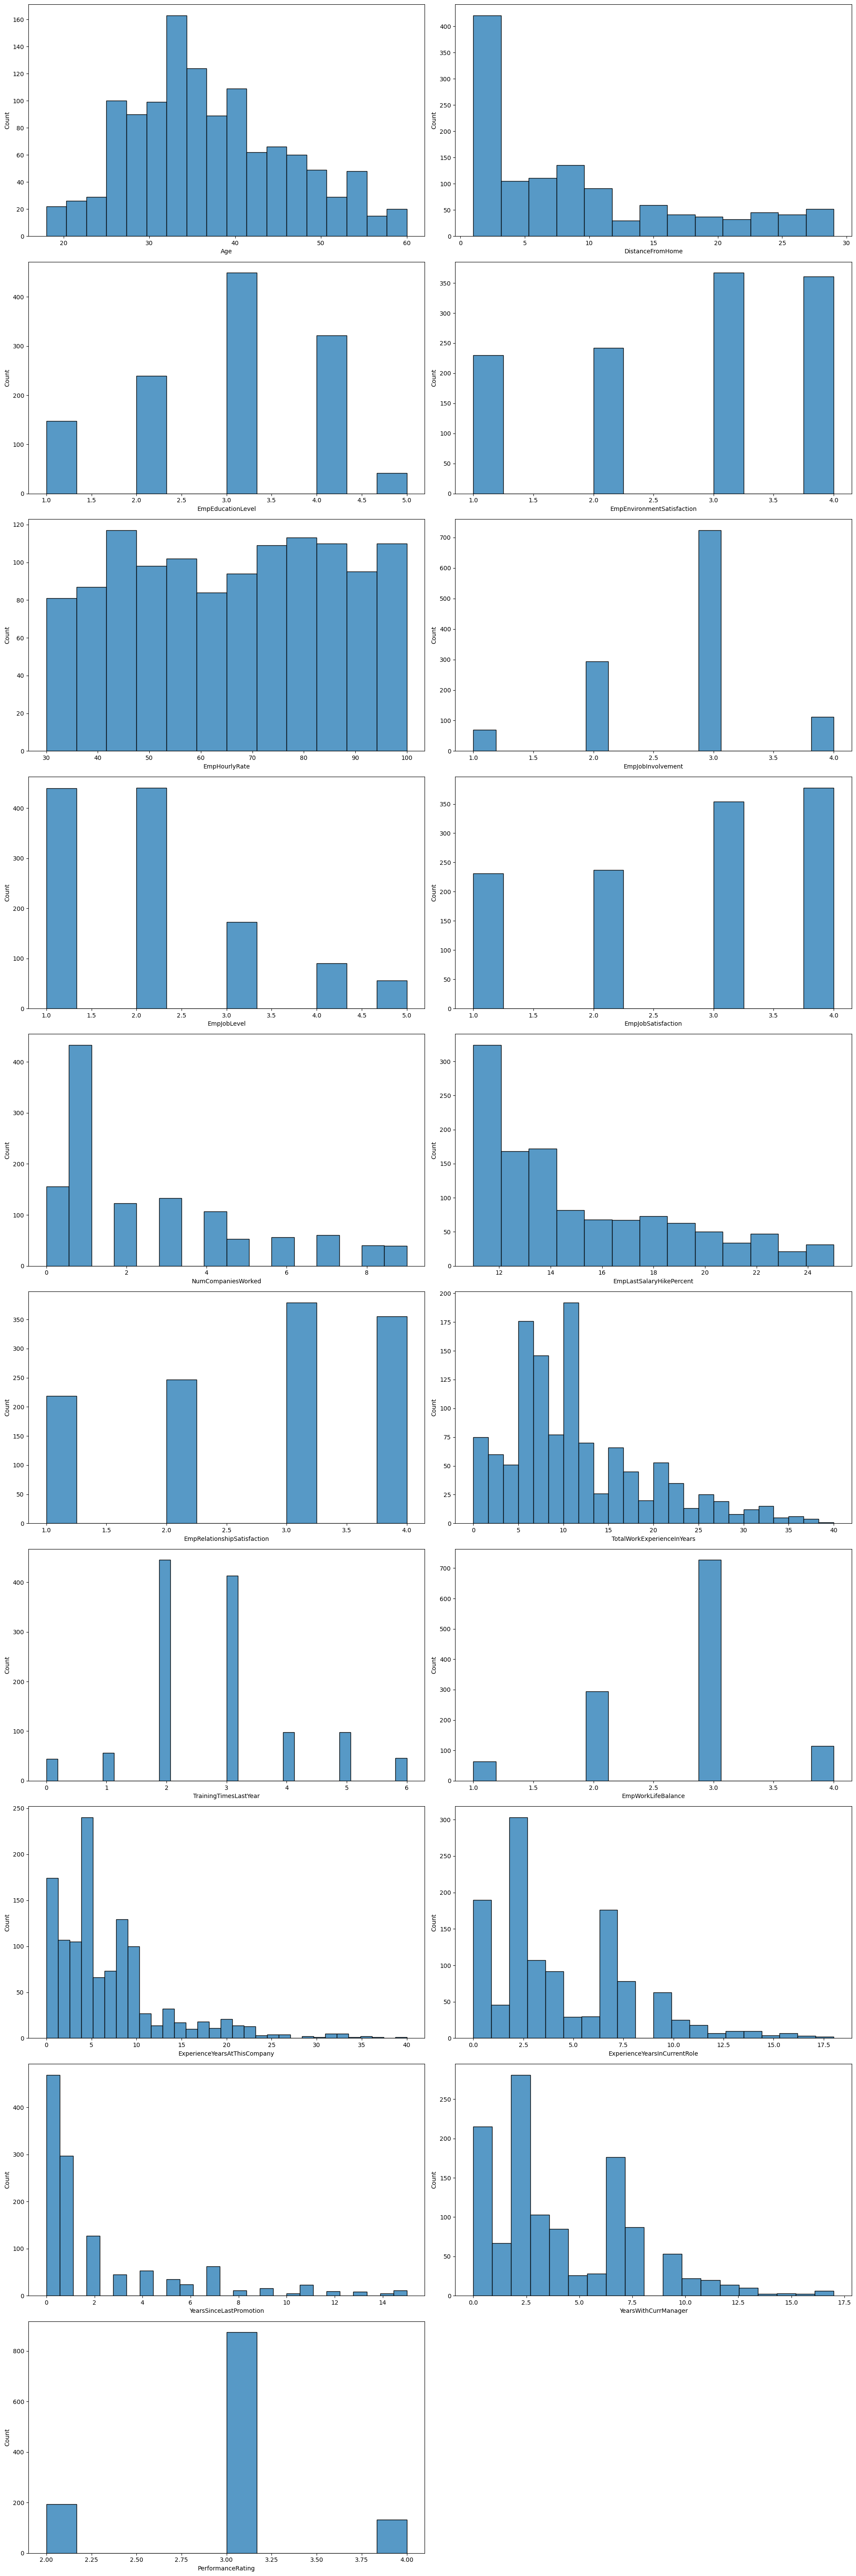

In [14]:
#univariant analysis of Numerical feature
plt.figure(figsize=(20,60))
for i in range(0,len(numerical_feature)):
    plt.subplot(10,2,i+1)
    sns.histplot(data[numerical_feature[i]])
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

# Departement wise Performance

In [19]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept=data.loc[:,['EmpDepartment','PerformanceRating']]
dept

EmpDepartment  PerformanceRating
0               Sales                  3
1               Sales                  3
2               Sales                  4
3     Human Resources                  3
4               Sales                  3
...               ...                ...
1195            Sales                  4
1196      Development                  3
1197      Development                  3
1198     Data Science                  3
1199            Sales                  2

[1200 rows x 2 columns]

In [20]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept.groupby(by='EmpDepartment').mean()

PerformanceRating
EmpDepartment                            
Data Science                     3.050000
Development                      3.085873
Finance                          2.775510
Human Resources                  2.925926
Research & Development           2.921283
Sales                            2.860590

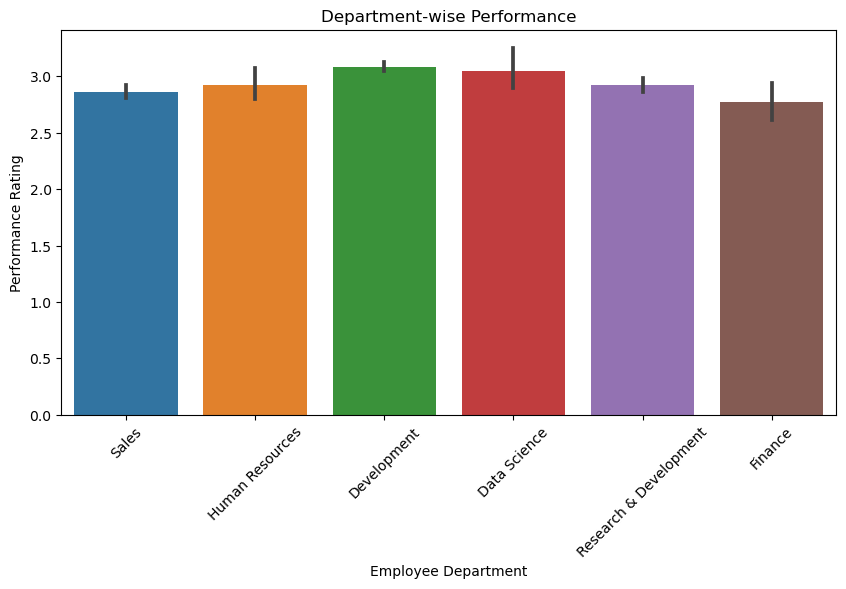

In [22]:
# Departement-wise performance
plt.figure(figsize=(10, 5))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=dept)
plt.xlabel('Employee Department')
plt.ylabel('Performance Rating')
plt.title('Department-wise Performance')
plt.xticks(rotation=45)
plt.show()

From the above graph we can conclude that from EmpDepartment Development department is showing high performance rate as compared to other department.

In [23]:
#analyse each department seperately
dept.groupby(by='EmpDepartment').value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
dtype: int64

In [24]:
# Creating a new dataframe to analyze each department separately
department=pd.get_dummies(dept.EmpDepartment)
performance=pd.DataFrame(data.PerformanceRating)
dept_rating=pd.concat([department,performance],axis=1)
dept_rating

Data Science  Development  Finance  Human Resources  \
0                0            0        0                0   
1                0            0        0                0   
2                0            0        0                0   
3                0            0        0                1   
4                0            0        0                0   
...            ...          ...      ...              ...   
1195             0            0        0                0   
1196             0            1        0                0   
1197             0            1        0                0   
1198             1            0        0                0   
1199             0            0        0                0   

      Research & Development  Sales  PerformanceRating  
0                          0      1                  3  
1                          0      1                  3  
2                          0      1                  4  
3                          0      0                  3  
4                          0      1                  3  
...                      ...    ...                ...  
1195                       0      1                  4  
1196                       0      0                  3  
1197                       0      0                  3  
1198                       0      0                  3  
1199                       0      1                  2  

[1200 rows x 7 columns]

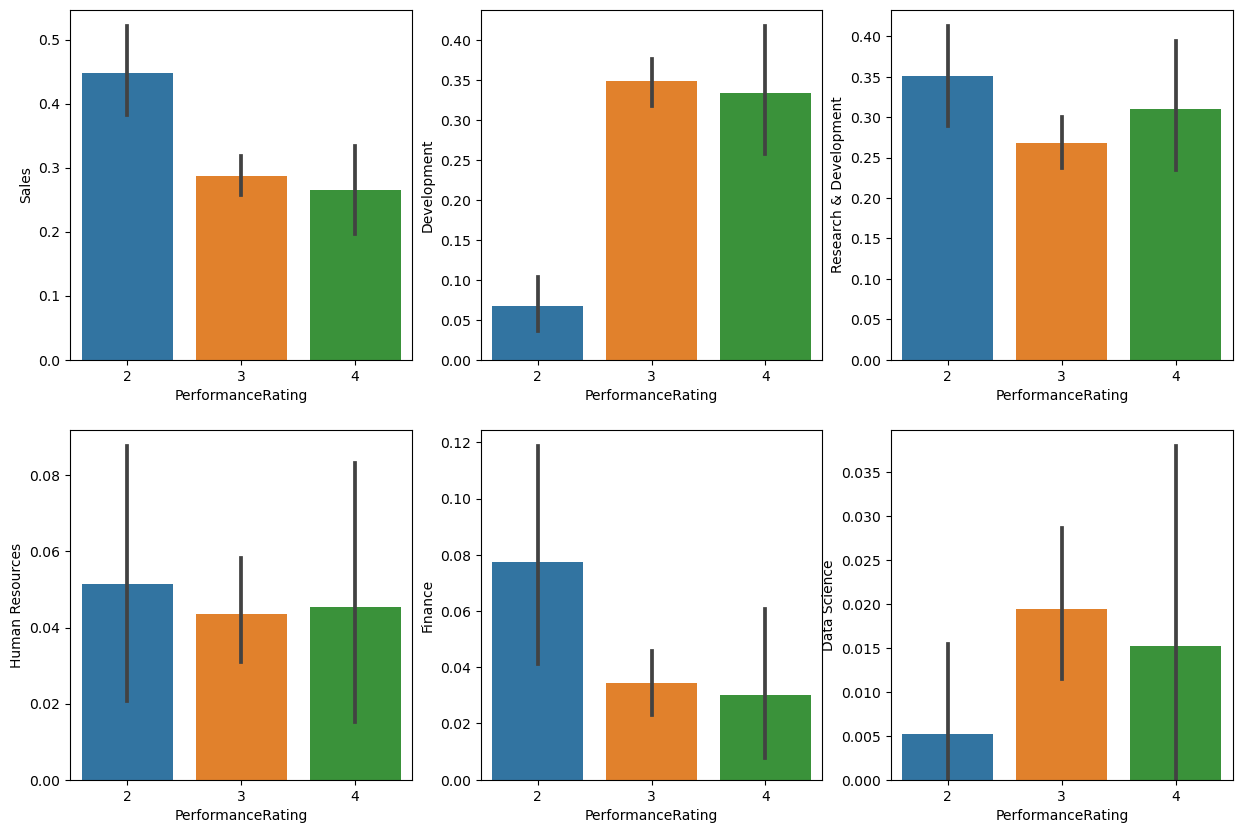

In [26]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x='PerformanceRating', y='Sales', data=dept_rating)
plt.subplot(2,3,2)
sns.barplot(x='PerformanceRating', y='Development', data=dept_rating)
plt.subplot(2,3,3)
sns.barplot(x='PerformanceRating', y='Research & Development', data=dept_rating)
plt.subplot(2,3,4)
sns.barplot(x='PerformanceRating', y='Human Resources', data=dept_rating)
plt.subplot(2,3,5)
sns.barplot(x='PerformanceRating', y='Finance', data=dept_rating)
plt.subplot(2,3,6)
sns.barplot(x='PerformanceRating', y='Data Science', data=dept_rating)
plt.show()

From the above graph we can conclude that from EmpDepartement Development department is showing high performance rate as compared to other departement.
After development department Research & Development department performed well.
Sales,Human resources, data science and finance also performed well.

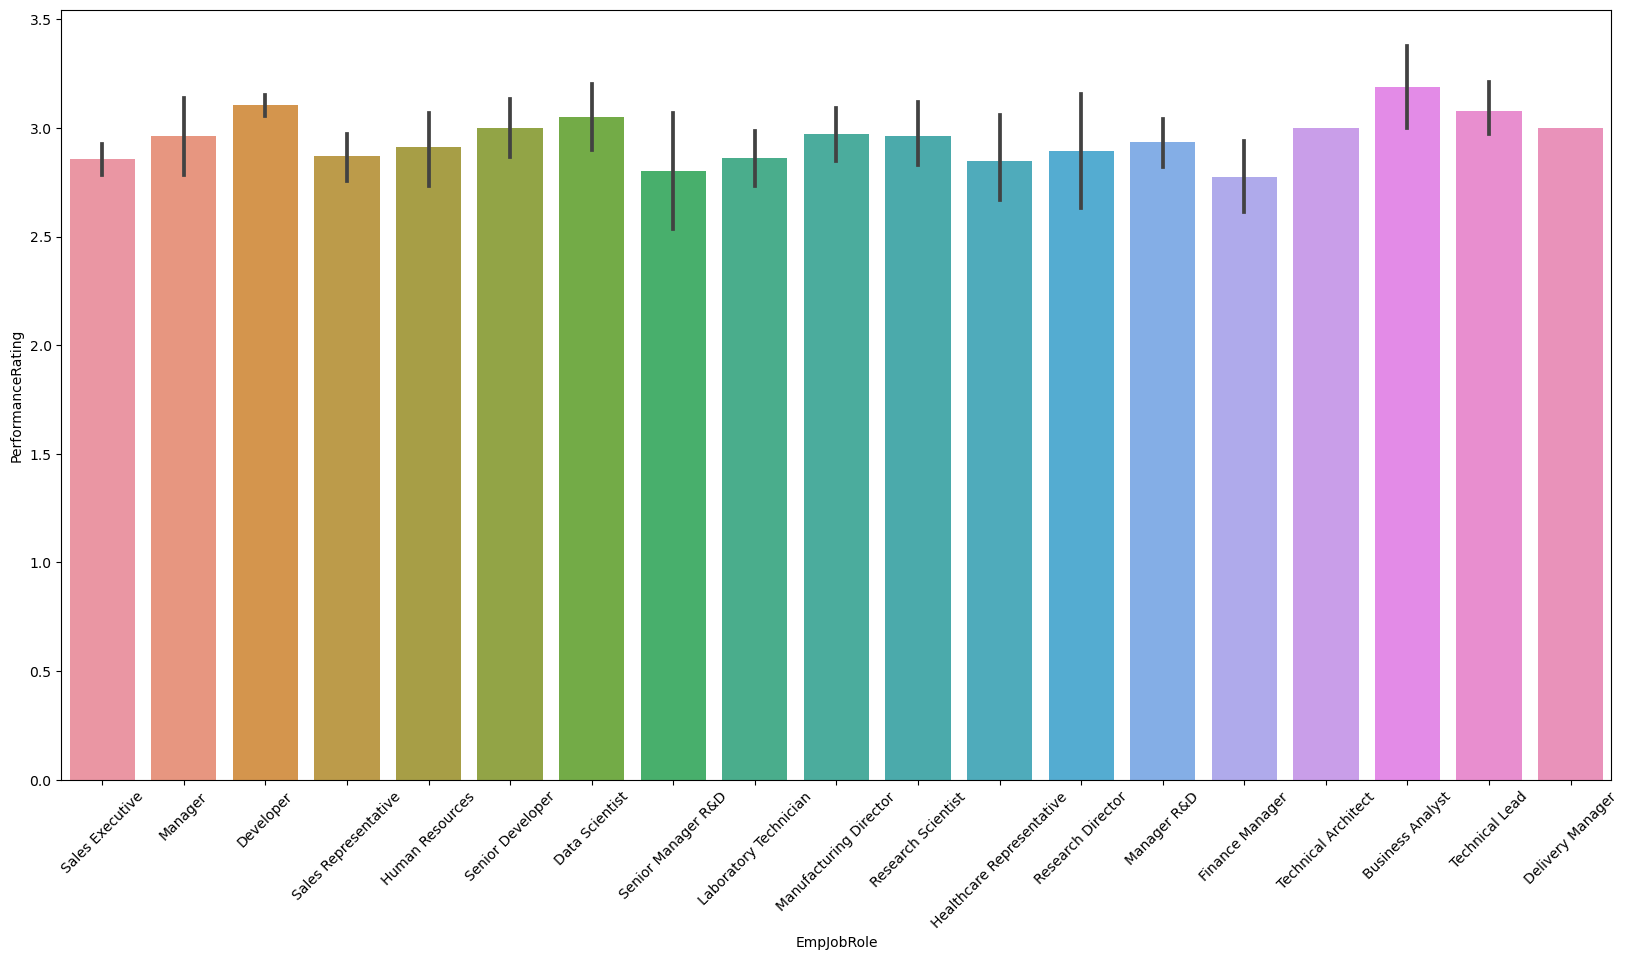

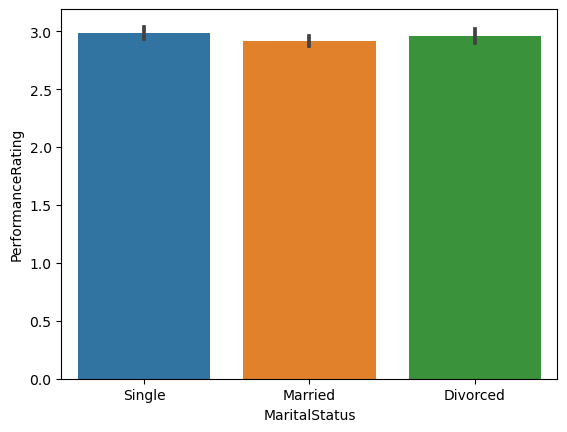

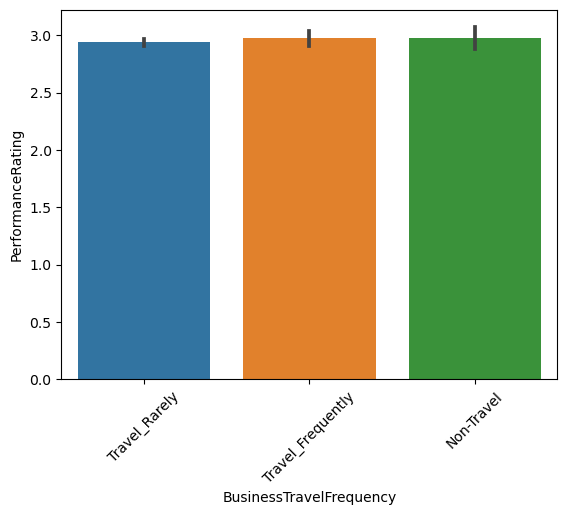

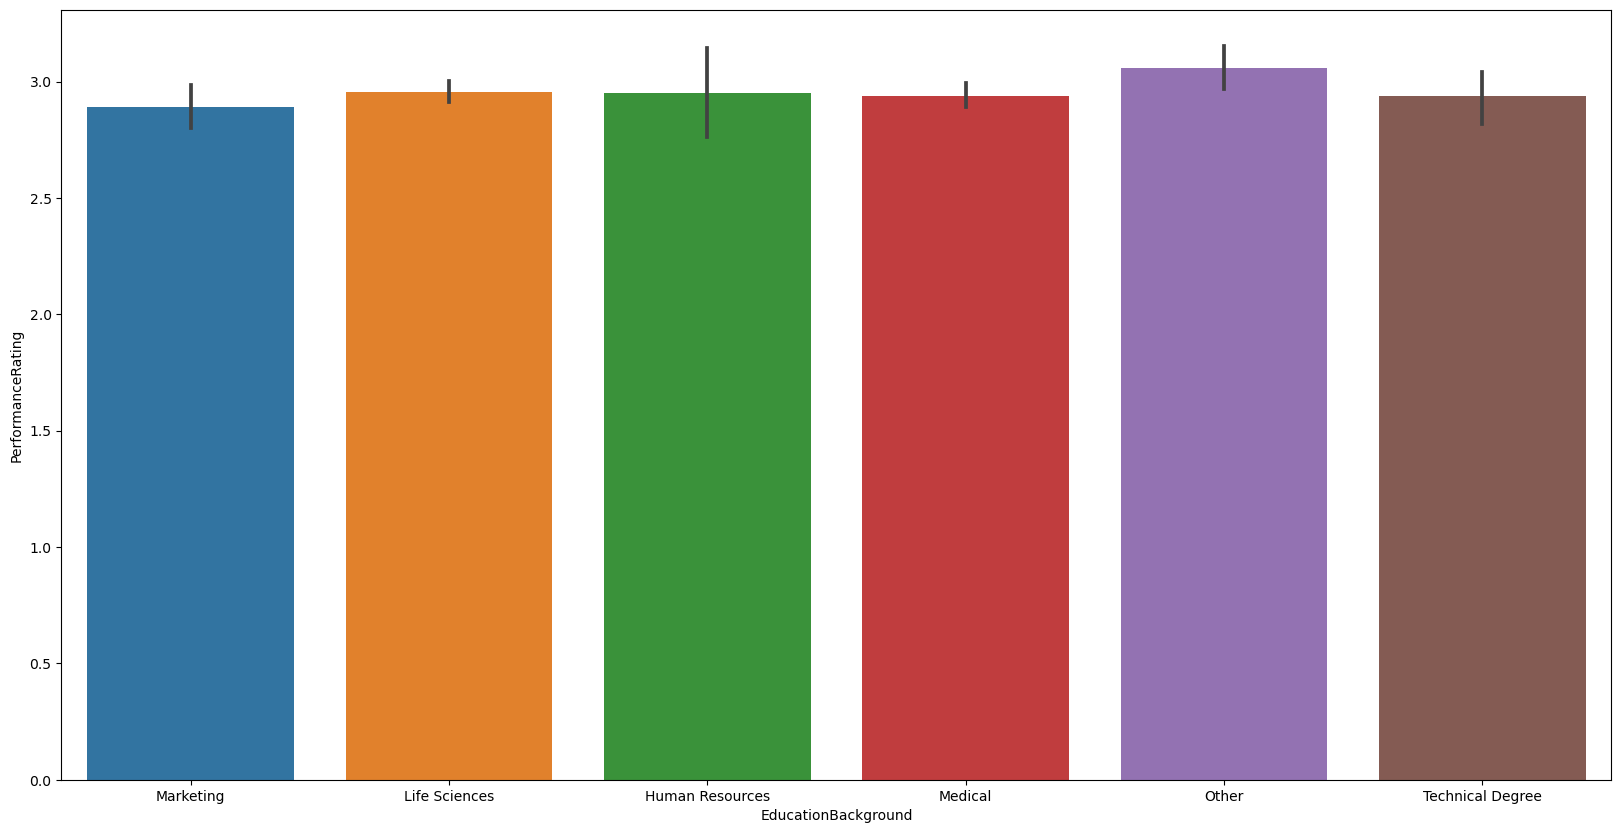

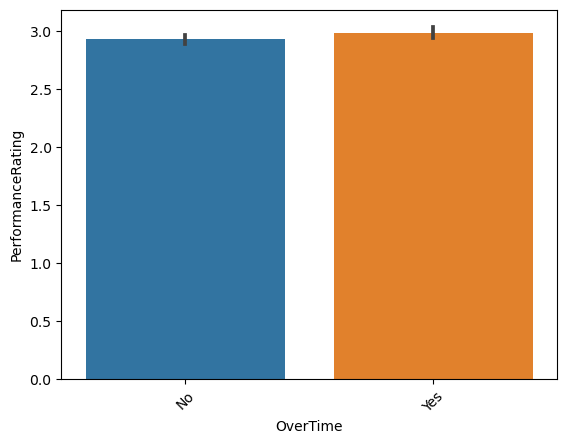

<Axes: xlabel='Attrition', ylabel='PerformanceRating'>

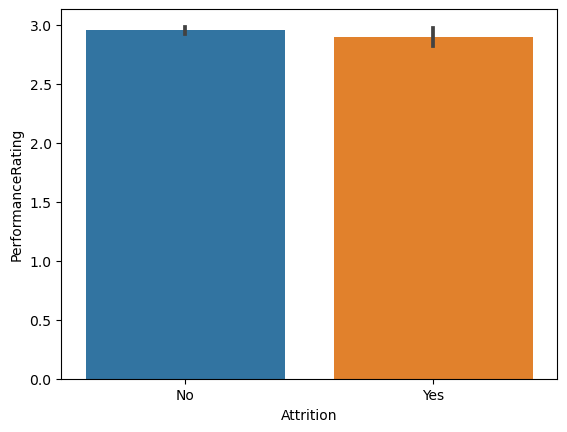

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x= data.EmpJobRole, y= data.PerformanceRating)
plt.xticks(rotation=45)
plt.show()
sns.barplot(x= data.MaritalStatus, y= data.PerformanceRating)
plt.show()
sns.barplot(x= data.BusinessTravelFrequency, y= data.PerformanceRating)
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(20,10))
sns.barplot(x= data.EducationBackground, y= data.PerformanceRating)
plt.show()
sns.barplot(x= data.OverTime, y= data.PerformanceRating)
plt.xticks(rotation=45)
plt.show()
sns.barplot(x= data.Attrition, y= data.PerformanceRating)

<Axes: xlabel='Gender', ylabel='EmpHourlyRate'>

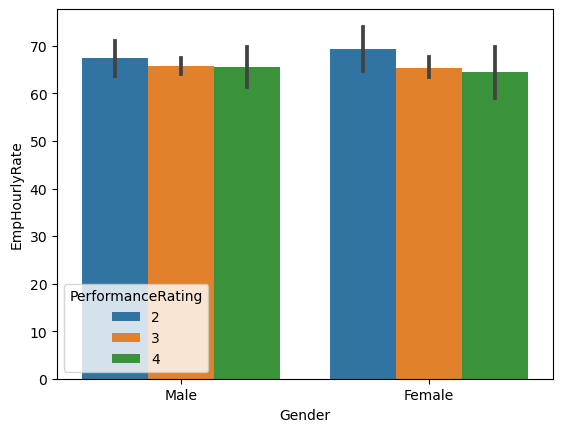

In [30]:
sns.barplot(x='Gender', y='EmpHourlyRate', hue='PerformanceRating', data=data)

In [31]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

<Axes: xlabel='Gender', ylabel='count'>

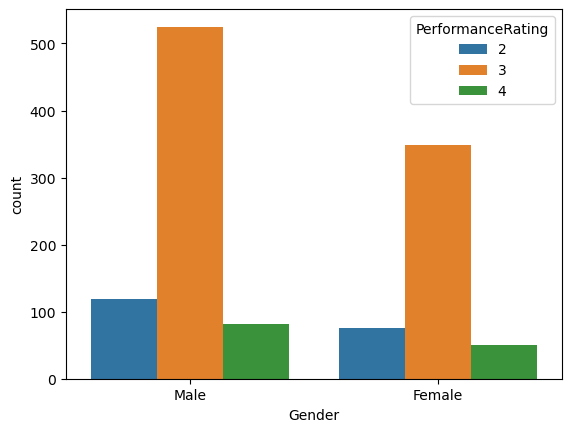

In [33]:
sns.countplot(x='Gender', hue='PerformanceRating', data=data)

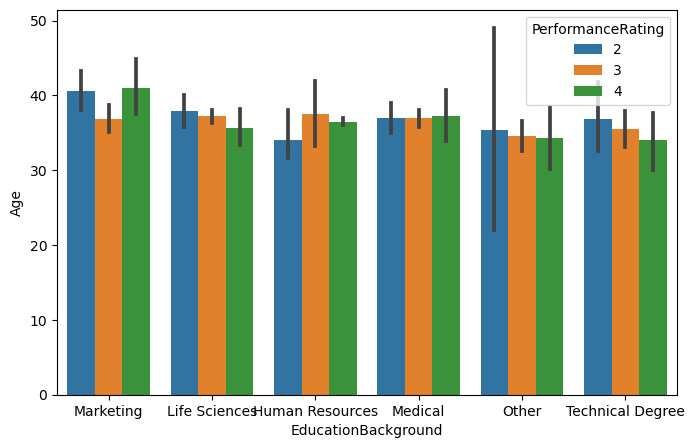

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(x='EducationBackground', y='Age', hue='PerformanceRating', data=data)
plt.show()

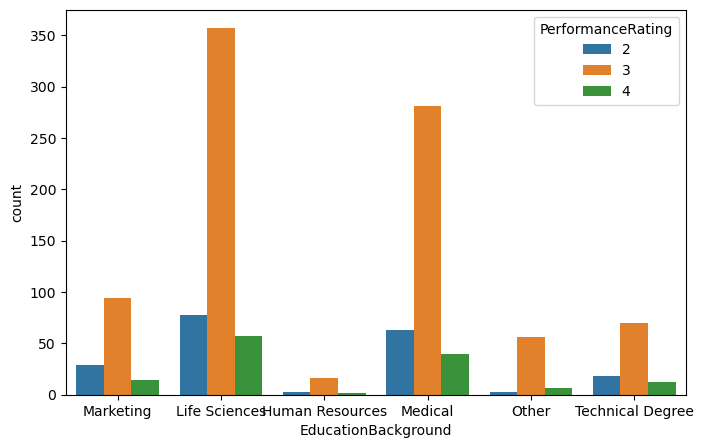

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x='EducationBackground', hue='PerformanceRating', data=data)
plt.show()

<Axes: xlabel='MaritalStatus', ylabel='count'>

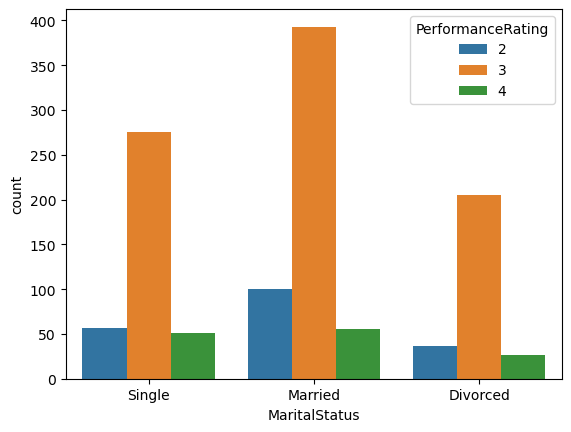

In [39]:
sns.countplot(x='MaritalStatus', hue='PerformanceRating', data=data)

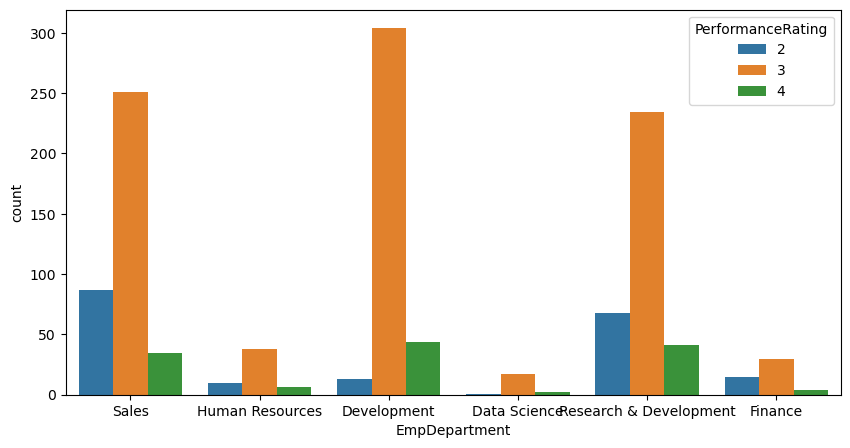

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=data)
plt.show()

<Axes: xlabel='BusinessTravelFrequency', ylabel='count'>

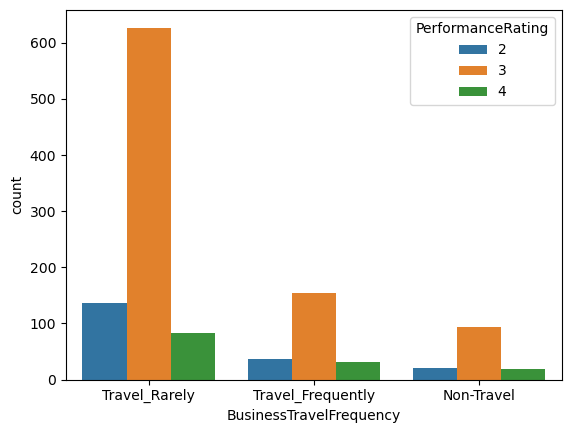

In [43]:
sns.countplot(x='BusinessTravelFrequency', hue='PerformanceRating', data=data)

<Axes: xlabel='OverTime', ylabel='count'>

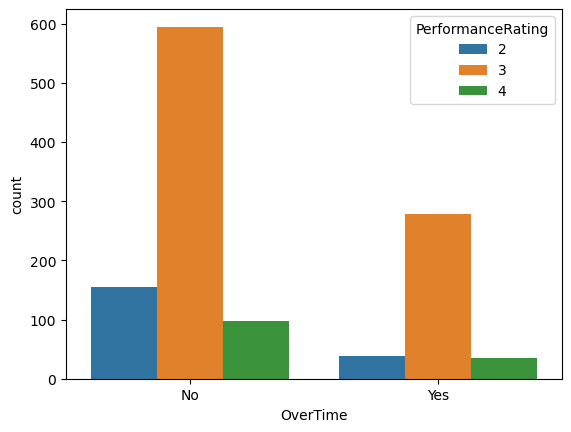

In [45]:
sns.countplot(x='OverTime', hue='PerformanceRating', data=data)

<Axes: xlabel='Gender', ylabel='DistanceFromHome'>

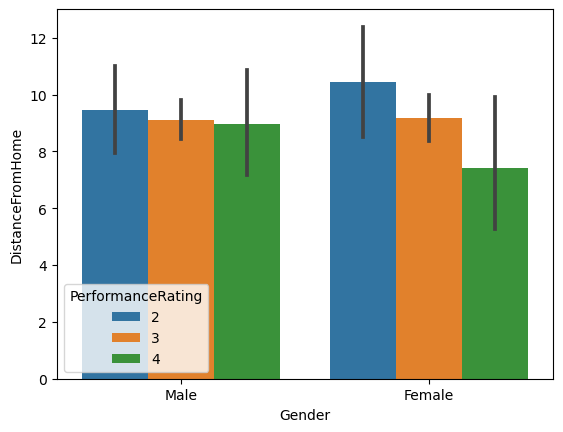

In [47]:
sns.barplot(x='Gender', y='DistanceFromHome', hue='PerformanceRating', data=data)

In [48]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

<Axes: xlabel='Attrition', ylabel='count'>

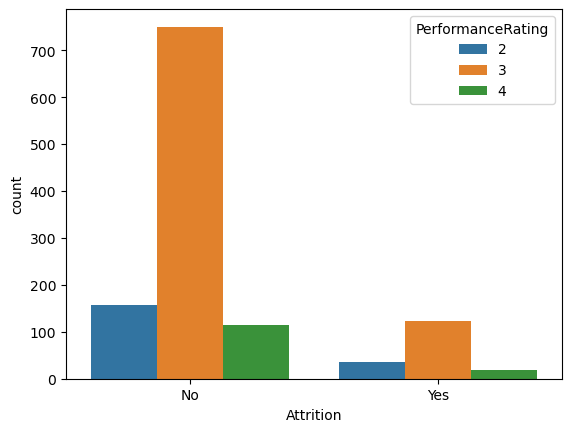

In [50]:
sns.countplot(x='Attrition', hue='PerformanceRating', data=data)

<Axes: xlabel='YearsWithCurrManager', ylabel='count'>

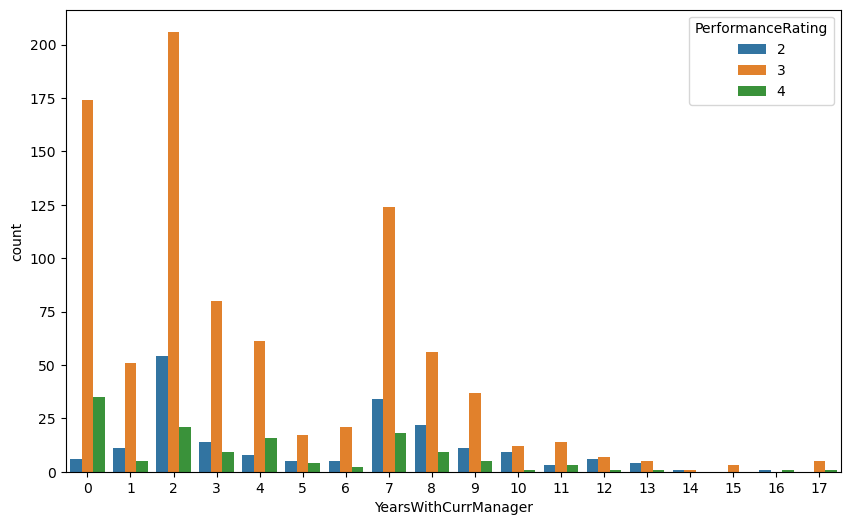

In [52]:
plt.figure(figsize=(10,6))
sns.countplot(x='YearsWithCurrManager', hue='PerformanceRating', data=data)

Performance rating of employee depends on Years with current manager.when manager is same for long duration of time the employee performace drops. So, for improving performance of employee the manager needs to shuffle atleast after every 2-3 years.

<Axes: xlabel='YearsSinceLastPromotion', ylabel='PerformanceRating'>

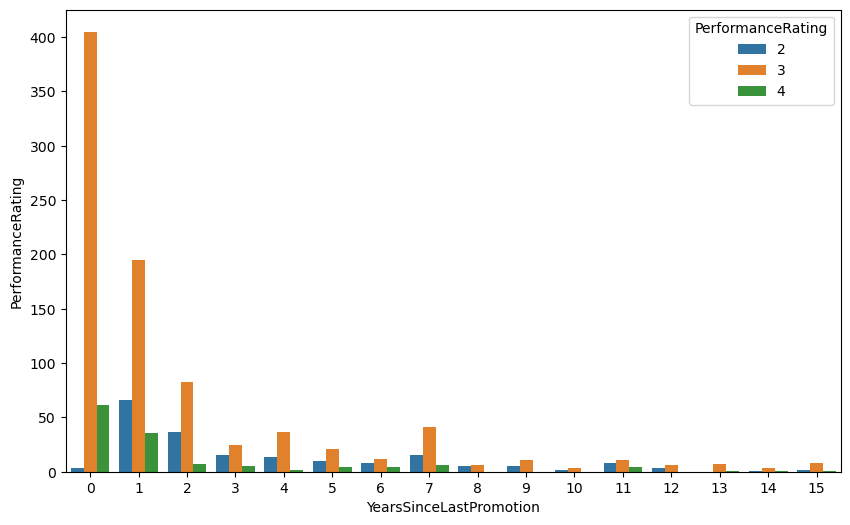

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x='YearsSinceLastPromotion', y='PerformanceRating', hue='PerformanceRating', data=data, estimator=lambda x: len(x))

performance rating depends on years since last promotion. when employee are not promoted since 2 to 3 years, the perfromance of employee drops. Hence to imporve performace of employee the employee should be promoted after every 1 year or at least 2 years.

<Axes: xlabel='EmpRelationshipSatisfaction', ylabel='count'>

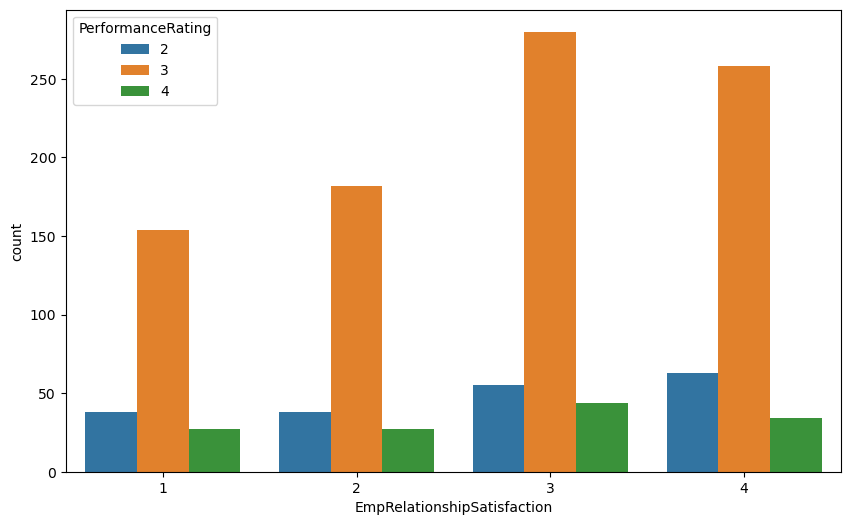

In [59]:
plt.figure(figsize=(10,6))
sns.countplot(x='EmpRelationshipSatisfaction', hue='PerformanceRating', data=data)

<Axes: xlabel='TotalWorkExperienceInYears', ylabel='count'>

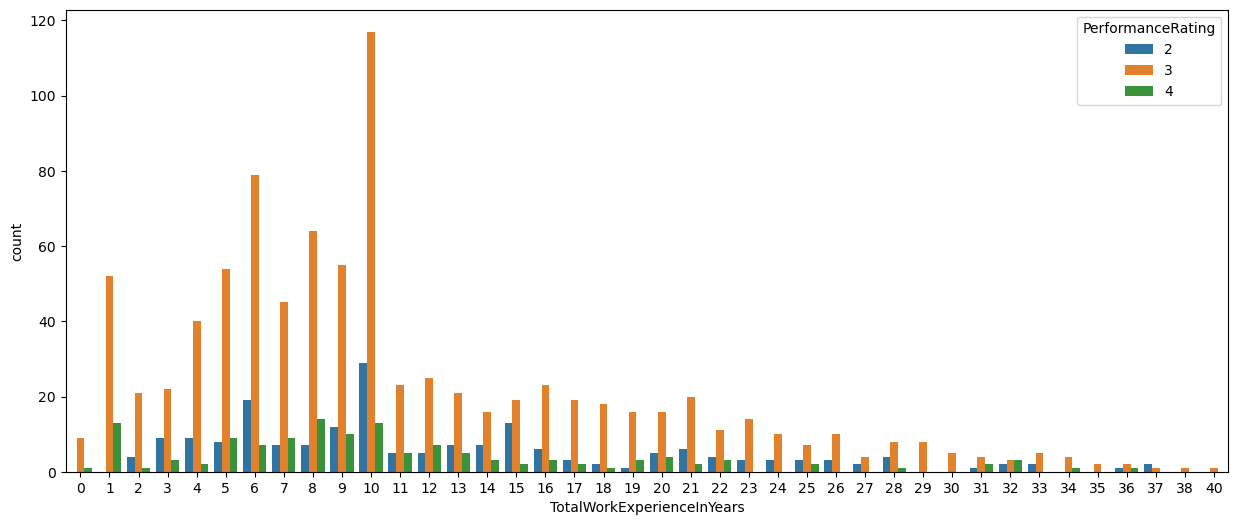

In [61]:
plt.figure(figsize=(15, 6))
sns.countplot(x='TotalWorkExperienceInYears', hue='PerformanceRating', data=data)

<Axes: xlabel='EmpLastSalaryHikePercent', ylabel='count'>

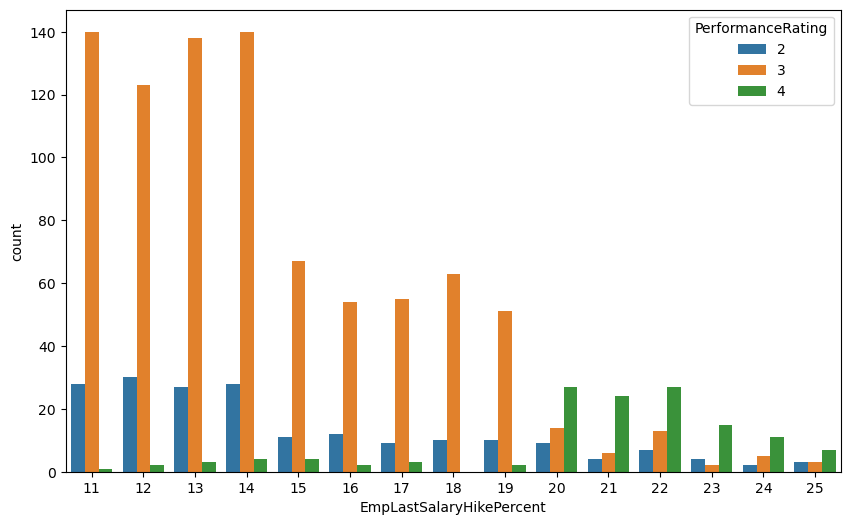

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='EmpLastSalaryHikePercent', hue='PerformanceRating', data=data)

when the employee got salary hike of more than 19%, the performce of employee increased. thus, employee performace depends on the salary hike given by the company. employee with higher salary hike percentage has performed well.

<Axes: xlabel='EmpJobLevel', ylabel='EmpEnvironmentSatisfaction'>

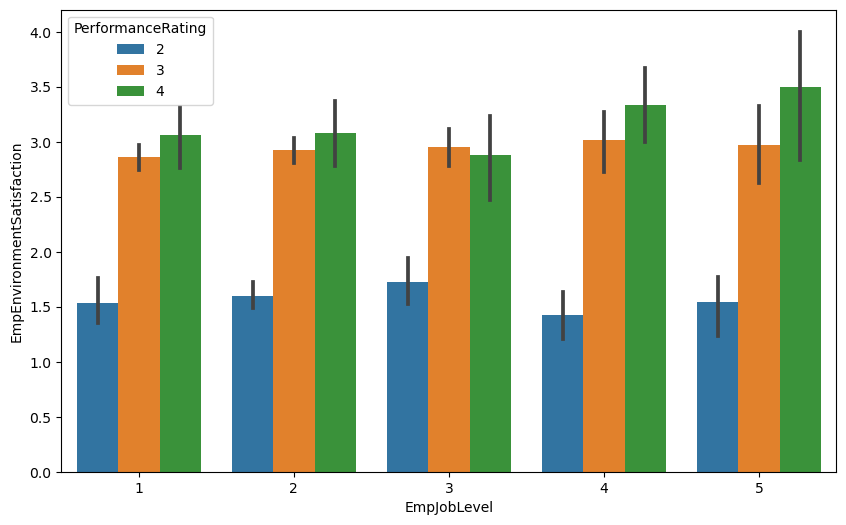

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='EmpJobLevel', y='EmpEnvironmentSatisfaction', hue='PerformanceRating', data=data)

Employee who are satisfied by environment have performed well.

<Axes: xlabel='EmpDepartment', ylabel='DistanceFromHome'>

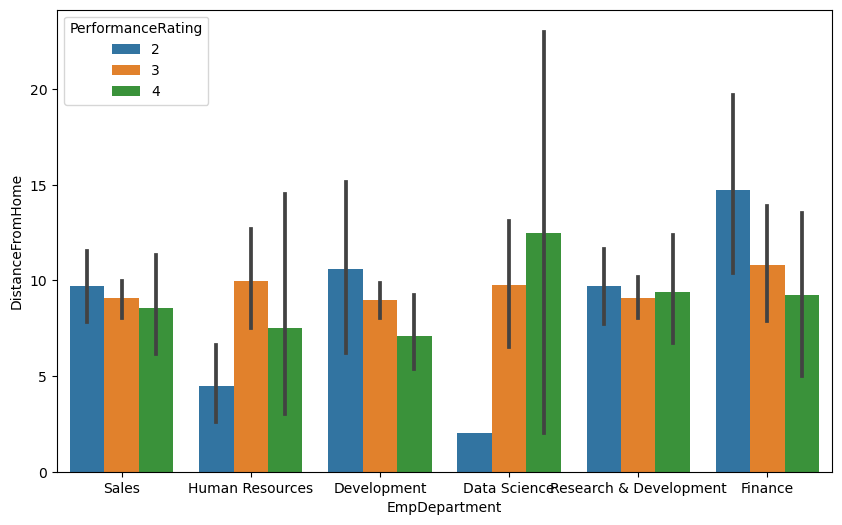

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='EmpDepartment', y='DistanceFromHome', hue='PerformanceRating', data=data)

<Axes: xlabel='EducationBackground', ylabel='EmpEducationLevel'>

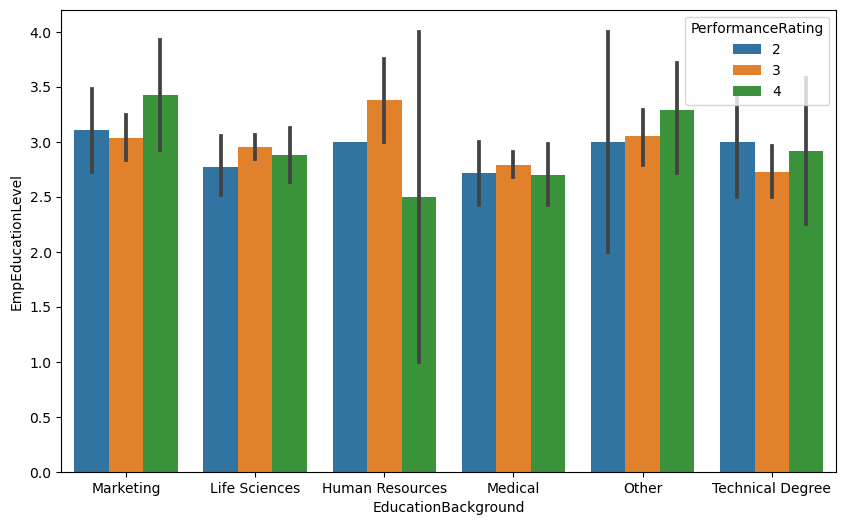

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='EducationBackground', y='EmpEducationLevel', hue='PerformanceRating', data=data)

In [70]:
import plotly.express as px
fig = px.pie(data, values='EmpJobSatisfaction', names= 'PerformanceRating', color= 'EmpJobInvolvement',
            title = 'Performance rating as per job involvement & job satisfaction',width=600, height=400)
fig.show()

We can see that 11% and 16.3% of employees having low job satisfaction and job involvement have low performance ratings

In [71]:
#Employee last salary hike percent
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating           2    3    4   All
EmpLastSalaryHikePercent                     
11                         28  140    1   169
12                         30  123    2   155
13                         27  138    3   168
14                         28  140    4   172
15                         11   67    4    82
16                         12   54    2    68
17                          9   55    3    67
18                         10   63    0    73
19                         10   51    2    63
20                          9   14   27    50
21                          4    6   24    34
22                          7   13   27    47
23                          4    2   15    21
24                          2    5   11    18
25                          3    3    7    13
All                       194  874  132  1200

In [72]:
#Employee Work life balance
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating     2    3    4   All
EmpWorkLifeBalance                     
1                    16   48    0    64
2                    51  216   27   294
3                   115  533   79   727
4                    12   77   26   115
All                 194  874  132  1200

In [73]:
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment      Data Science  Development  Finance  Human Resources  \
PerformanceRating                                                        
2                          0.08         1.08     1.25             0.83   
3                          1.42        25.33     2.50             3.17   
4                          0.17         3.67     0.33             0.50   
All                        1.67        30.08     4.08             4.50   

EmpDepartment      Research & Development  Sales     All  
PerformanceRating                                         
2                                    5.67   7.25   16.17  
3                                   19.50  20.92   72.83  
4                                    3.42   2.92   11.00  
All                                 28.58  31.08  100.00

So from the below data we got clear indication of those employees who have low performance, low job involvement and have less or equal to 2 years of experience.

In [74]:
# Filtering those employees whose performance rating is low but working in thiscompany for less or equal to 2 years
low_per=data.loc[(data['PerformanceRating']==2) & (data['Attrition']=='No')& (data['EmpJobInvolvement']<= 2)& 
                 (data['ExperienceYearsAtThisCompany'] <= 2),['EmpNumber','ExperienceYearsAtThisCompany',
                                                              'EmpJobInvolvement','Attrition','PerformanceRating']]
low_per

EmpNumber  ExperienceYearsAtThisCompany  EmpJobInvolvement Attrition  \
165   E1001300                             2                  2        No   
182   E1001322                             2                  2        No   
605   E1002079                             2                  2        No   
728   E1002291                             2                  2        No   
878    E100461                             2                  2        No   
1023   E100702                             2                  2        No   

      PerformanceRating  
165                   2  
182                   2  
605                   2  
728                   2  
878                   2  
1023                  2

So, As per our Goal, those 6 non performing employees can be penalized or given final warning for their performance.

In [76]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

From above visualization, we can clearly observe that Salary hike, Environment satisfaction,Job satisfaction, Employee experience marked great impact on Performance ratings. So, from management side, they need to look after in these matters to increase the employees performance.

# Data Processing

# Checking Null values

In [89]:
#checking null values in our data
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

There are no null values in our data

# Encoding Catagorical feature to Numerical

In [90]:
#Encoding catagorical feature to numerical  
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i]=label.fit_transform(data.iloc[:,i])
data.head()

EmpNumber  Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0  E1001000   32       1                    2              2              5   
1  E1001006   47       1                    2              2              5   
2  E1001007   40       1                    1              1              5   
3  E1001009   41       1                    0              0              3   
4  E1001010   60       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3

In [91]:
data.drop('EmpNumber',axis=1,inplace=True)  #droping unique feature

In [92]:
# finding skewness and kurtosis to check the normalization of feature.
from scipy import stats 
for column in data:
    skewness=stats.skew(data[column])
    kurtosis=stats.kurtosis(data[column])
    print(column,'skewness is',skewness)
    print(column,'kurtosis is',kurtosis)

Age skewness is 0.3836646110785685
Age kurtosis is -0.4342016798705739
Gender skewness is -0.42601432284230467
Gender kurtosis is -1.8185117967332127
EducationBackground skewness is 0.5513749427617737
EducationBackground kurtosis is -0.65174298239753
MaritalStatus skewness is -0.15144003526169916
MaritalStatus kurtosis is -1.119700089850293
EmpDepartment skewness is -0.40791122659206125
EmpDepartment kurtosis is -1.505003648253274
EmpJobRole skewness is -0.11151335264121637
EmpJobRole kurtosis is -1.25602866999997
BusinessTravelFrequency skewness is -1.4010025618647997
BusinessTravelFrequency kurtosis is 0.5486513912585655
DistanceFromHome skewness is 0.9617520027440261
DistanceFromHome kurtosis is -0.2460053857006934
EmpEducationLevel skewness is -0.2506601284752214
EmpEducationLevel kurtosis is -0.6379446256527972
EmpEnvironmentSatisfaction skewness is -0.30728009854747024
EmpEnvironmentSatisfaction kurtosis is -1.2055559189315166
EmpHourlyRate skewness is -0.03512091677629664
EmpHou

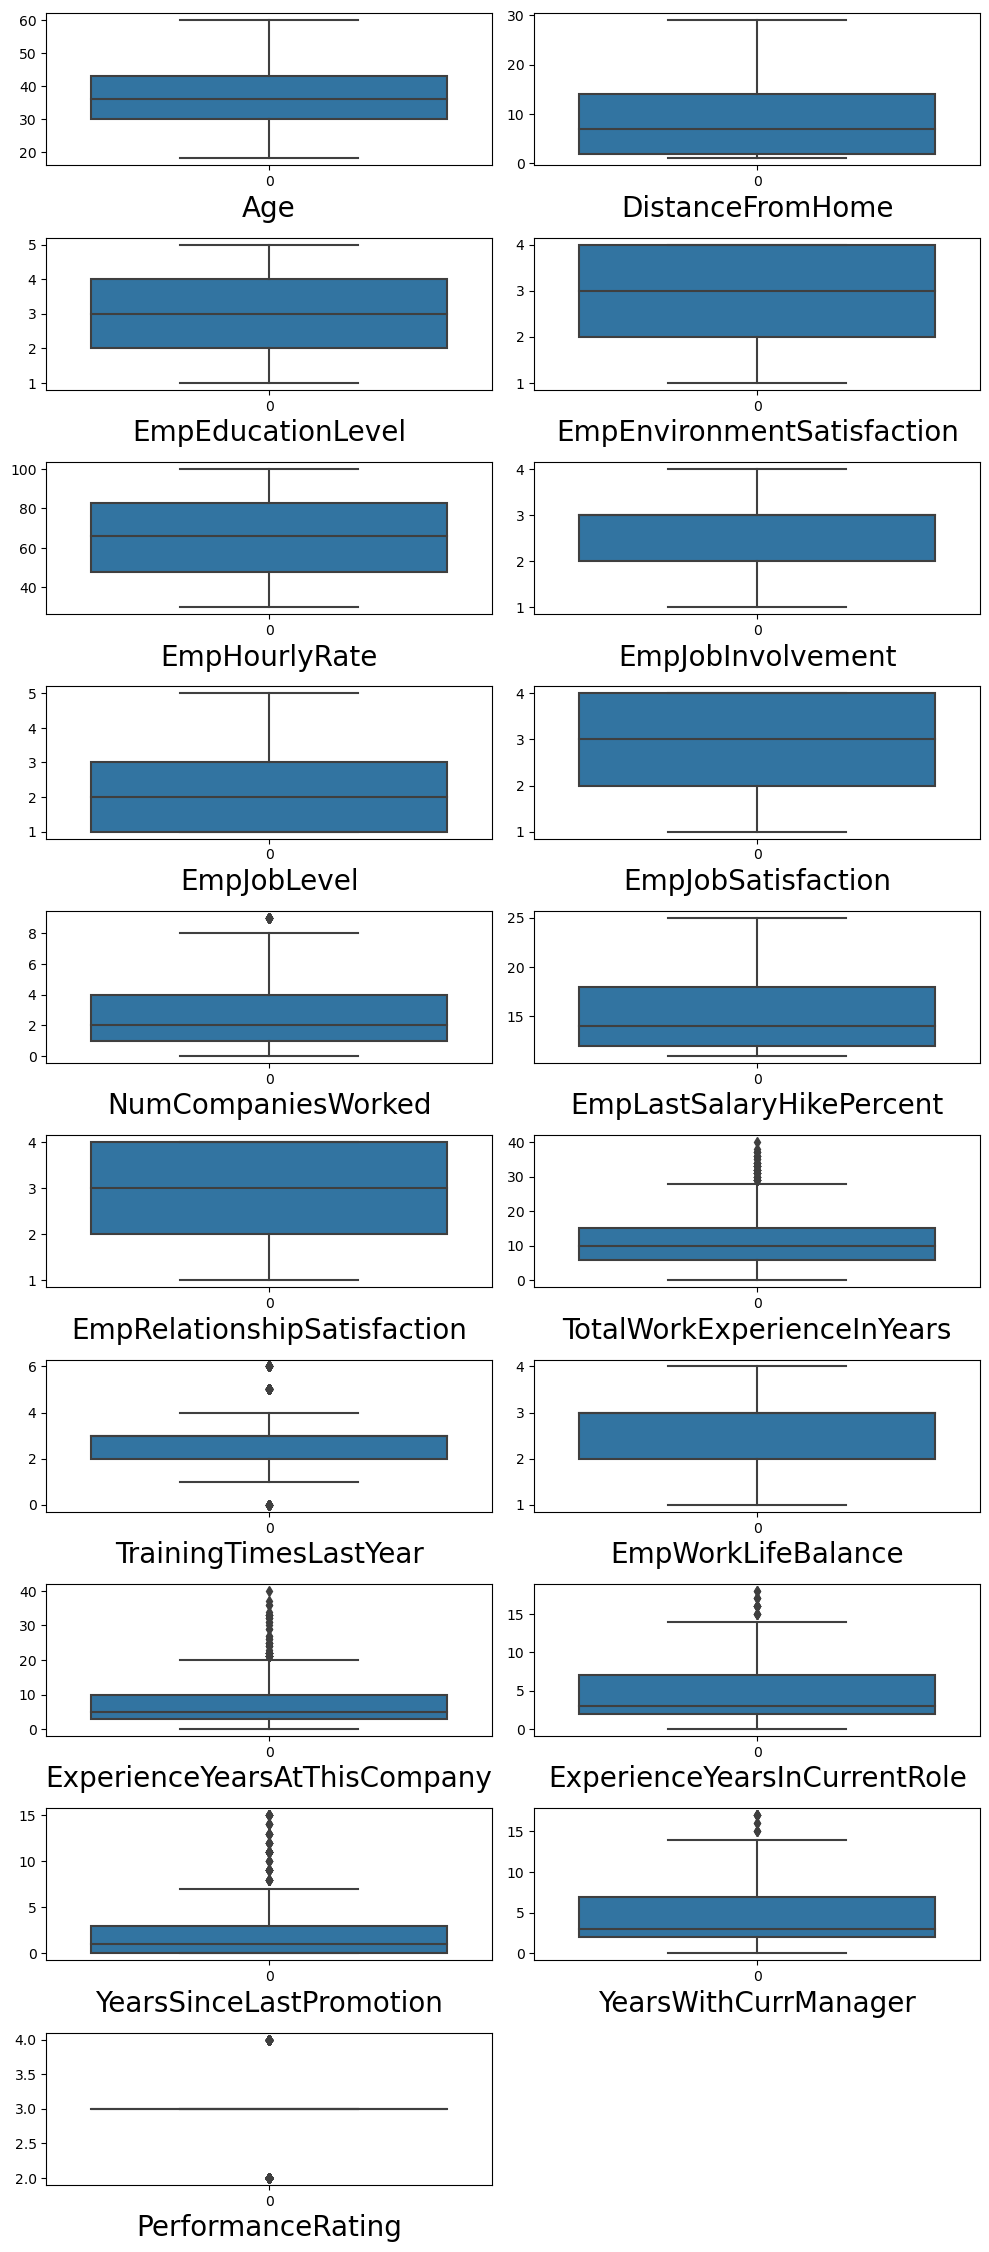

In [93]:
#checking outliers
plt.figure(figsize=(10,40))
plotnumber=1
for column in numerical_feature:
    if plotnumber<=28:
        ax=plt.subplot(18,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We have outliers for below features:-
TotalWorkExperienceInYears,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,
YearsSinceLastPromotion,YearsWithCurrManager

In [94]:
# TotalWorkExperienceInYears is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=data.TotalWorkExperienceInYears.mean() - 3*data.TotalWorkExperienceInYears.std()##calculating lower limit
print(lower_limit)

upper_limit=data.TotalWorkExperienceInYears.mean() + 3*data.TotalWorkExperienceInYears.std()#calculating upper limit
print(upper_limit)
data.loc[data['TotalWorkExperienceInYears']<lower_limit]#checking values which are less than minimum limit
data.loc[data['TotalWorkExperienceInYears']>upper_limit]#checking values which are greater than maximum limit
display(len(data.loc[data['TotalWorkExperienceInYears']>upper_limit])/1200) #checking percent of outliers
data.loc[data['TotalWorkExperienceInYears']>upper_limit,'TotalWorkExperienceInYears']=np.mean(data.TotalWorkExperienceInYears) #imputing value with mean as outliers percentage are less than 5%
display(data.loc[data['TotalWorkExperienceInYears']>upper_limit]) #reckeck

-12.061683901117005
34.721683901117004


0.009166666666666667

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [95]:
# ExperienceYearsAtThisCompany is not normally distributed hence we use IQR rule to remove outliers
from scipy import stats
IQR = stats.iqr(data.ExperienceYearsAtThisCompany, interpolation = 'midpoint') #calculating Inter quantile range
display(IQR)
Q1=data.ExperienceYearsAtThisCompany.quantile(0.25)#defining 25% of data
Q3=data.ExperienceYearsAtThisCompany.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR #setting minimum limit
max_limit=Q3 + 1.5*IQR #setting maximum limit
display(data.loc[data['ExperienceYearsAtThisCompany']<min_limit]) #checking values which are less than minimum limit
display(data.loc[data['ExperienceYearsAtThisCompany']>max_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['ExperienceYearsAtThisCompany']>max_limit])/18278)
#imputing outlier with with median
data.loc[data['ExperienceYearsAtThisCompany']>max_limit,'ExperienceYearsAtThisCompany']=np.median(data.ExperienceYearsAtThisCompany)
data.loc[data['ExperienceYearsAtThisCompany']>max_limit] #checking whether outlier remove or not

7.0

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
25     52       1                    2              1              5   
52     47       0                    4              1              1   
100    50       1                    1              0              1   
168    39       0                    1              1              4   
175    41       0                    1              0              4   
178    52       0                    2              1              5   
181    39       0                    3              2              4   
216    42       1                    3              1              4   
252    42       1                    1              2              5   
272    46       0                    2              1              5   
304    44       1                    2              1              5   
307    45       0                    2              2              5   
308    55       1                    3              0              4   
312    51       1                    1              0              5   
316    44       1                    1              0              4   
320    43       0                    2              2              5   
347    51       1                    1              0              3   
450    50       1                    3              2              4   
459    40       1                    3              2              3   
471    53       0                    5              1              4   
475    55       1                    2              1              5   
490    50       1                    3              1              2   
492    44       0                    3              0              2   
555    45       1                    1              1              4   
557    45       0                    5              2              4   
571    40       1                    3              2              5   
613    41       0                    2              0              5   
617    47       0                    1              0              4   
642    48       1                    1              1              4   
658    48       0                    3              0              4   
777    53       0                    1              1              5   
785    44       0                    3              1              1   
816    50       0                    3              0              1   
817    59       0                    1              2              5   
838    40       1                    1              1              1   
845    58       1                    3              2              5   
862    43       1                    1              1              5   
867    58       0                    3              1              1   
911    46       0                    2              0              5   
921    52       1                    1              1              1   
956    42       1                    5              1              1   
962    52       1                    1              2              5   
978    40       1                    3              0              0   
989    55       1                    3              2              1   
1015   41       1                    1              2              5   
1024   45       1                    1              0              1   
1027   39       1                    3              1              1   
1036   39       1                    3              1              1   
1086   43       1                    1              0              1   
1094   39       1                    1              0              1   
1104   60       0                    1              1              1   
1117   50       1                    1              1              1   
1156   49       1                    1        

0.003063792537476748

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [96]:
# ExperienceYearsInCurrentRole is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=data.ExperienceYearsInCurrentRole.mean() - 3*data.ExperienceYearsInCurrentRole.std()##calculating lower limit
display(lower_limit)

upper_limit=data.ExperienceYearsInCurrentRole.mean() + 3*data.ExperienceYearsInCurrentRole.std()#calculating upper limit
display(upper_limit)
display(data.loc[data['ExperienceYearsInCurrentRole']<lower_limit])#checking values which are less than minimum limit
display(data.loc[data['ExperienceYearsInCurrentRole']>upper_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['ExperienceYearsInCurrentRole']>upper_limit])/1200) #checking percent of outliers
data.loc[data['ExperienceYearsInCurrentRole']>upper_limit,'ExperienceYearsInCurrentRole']=np.mean(data.ExperienceYearsInCurrentRole) #imputing value with mean as outliers percentage are less than 5%
display(data.loc[data['ExperienceYearsInCurrentRole']>upper_limit]) #reckeck

-6.5495656709798675

15.132899004313202

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
151    41       1                    3              0              1   
175    41       0                    1              0              4   
361    56       1                    1              1              4   
639    46       0                    5              0              5   
658    48       0                    3              0              4   
730    38       0                    3              1              4   
817    59       0                    1              2              5   
864    51       1                    1              2              1   
921    52       1                    1              1              1   
956    42       1                    5              1              1   
999    42       1                    1              1              5   
1152   41       0                    1              1              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
151            3                        1                 9   
175           11                        0                 7   
361            9                        2                23   
639           13                        2                 3   
658            8                        1                22   
730           11                        2                10   
817           13                        2                25   
864            3                        2                 6   
921            3                        2                 1   
956            3                        2                 4   
999           13                        2                 1   
1152           8                        2                 2   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
151                   3                           1             64   
175                   1                           2             55   
361                   3                           4             68   
639                   3                           1             45   
658                   3                           4             58   
730                   3                           2             99   
817                   3                           1             99   
864                   3                           1             51   
921                   4                           3             65   
956                   2                           3             58   
999                   1                           2             99   
1152                  5                           2             91   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
151                   3            5                   3                   2   
175                   1            5                   3                   1   
361                   3            4                   2                   4   
639                   4            4                   1                   2   
658                   3            4                   4                   3   
730                   1            3                   3                   3   
817                   3            3                   1                   7   
864                   3            5                   3                   7   
921                   2            5                   3                   0   
956                   3            5                   4                   1   
999                   3            2                   3                   1   
1152                  3            4                   1                   7   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
151          0                        17                            2   
175          0                        22                            2   
361          1                        12                            1   
639  

0.01

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [97]:
# YearsSinceLastPromotion is not normally distributed hence we use IQR rule to remove outliers
IQR = stats.iqr(data.YearsSinceLastPromotion, interpolation = 'midpoint') #calculating Inter quantile range
display(IQR)
Q1=data.YearsSinceLastPromotion.quantile(0.25)#defining 25% of data
Q3=data.YearsSinceLastPromotion.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR #setting minimum limit
max_limit=Q3 + 1.5*IQR #setting maximum limit
display(data.loc[data['YearsSinceLastPromotion']<min_limit]) #checking values which are less than minimum limit
display(data.loc[data['YearsSinceLastPromotion']>max_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['YearsSinceLastPromotion']>max_limit])/18278)
#imputing outlier with with median
data.loc[data['YearsSinceLastPromotion']>max_limit,'YearsSinceLastPromotion']=np.median(data.YearsSinceLastPromotion)
data.loc[data['YearsSinceLastPromotion']>max_limit] #checking whether outlier remove or not

3.0

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
100    50       1                    1              0              1   
130    31       0                    3              1              1   
132    37       1                    1              1              5   
...   ...     ...                  ...            ...            ...   
1152   41       0                    1              1              5   
1160   50       1                    3              1              3   
1181   34       1                    1              1              1   
1185   35       1                    1              2              1   
1189   33       1                    1              2              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3              8                        2                10   
11            13                        1                 3   
100            3                        0                 2   
130            3                        2                12   
132           13                        2                 1   
...          ...                      ...               ...   
1152           8                        2                 2   
1160           8                        1                 3   
1181          15                        2                 1   
1185          15                        2                 6   
1189          15                        1                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
3                     4                           2             73   
11                    3                           4             49   
100                   4                           1             98   
130                   3                           4             41   
132                   4                           1             46   
...                 ...                         ...            ...   
1152                  5                           2             91   
1160                  3                           1             99   
1181                  5                           2             42   
1185                  4                           2             82   
1189                  3                           1             70   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
3                     2            5                   4                   3   
11                    3            4                   3                   9   
100                   3            4                   1                   1   
130                   3            2                   4                   0   
132                   2            3                   3                   5   
...                 ...          ...                 ...                 ...   
1152                  3            4                   1                   7   
1160                  3            5                   2                   1   
1181                  3            1                   4                   1   
1185                  1            2                   4                   1   
1189                  3            1                   1                   1   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
3            0                        15                            2   
11           1                        12                            4   
100          0                        11                            4   
130          1                        11                            3   
132          0                        11                            3   
...        ...                       ...                          ...   
1152         0                        16                            2  

0.004814531130320604

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [98]:
# YearsWithCurrManager is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=data.YearsWithCurrManager.mean() - 3*data.YearsWithCurrManager.std()##calculating lower limit
print(lower_limit)

upper_limit=data.YearsWithCurrManager.mean() + 3*data.YearsWithCurrManager.std()#calculating upper limit
print(upper_limit)
display(data.loc[data['YearsWithCurrManager']<lower_limit])#checking values which are less than minimum limit
display(data.loc[data['YearsWithCurrManager']>upper_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['YearsWithCurrManager']>upper_limit])/1200) #checking percent of outliers
data.loc[data['YearsWithCurrManager']>upper_limit,'YearsWithCurrManager']=np.mean(data.YearsWithCurrManager) #imputing value with mean as outliers percentage are less than 5%
display(data.loc[data['YearsWithCurrManager']>upper_limit]) #reckeck

-6.519728029684055
14.729728029684056


Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
25     52       1                    2              1              5   
72     51       0                    2              1              5   
126    41       1                    3              2              1   
283    44       1                    4              2              4   
320    43       0                    2              2              5   
655    40       1                    1              0              4   
785    44       0                    3              1              1   
864    51       1                    1              2              1   
888    45       1                    1              0              1   
956    42       1                    5              1              1   
1083   37       0                    1              0              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
25             8                        2                 3   
72             8                        2                26   
126            3                        2                 6   
283           12                        2                29   
320           13                        2                 4   
655            9                        2                 1   
785            3                        2                 7   
864            3                        2                 6   
888            3                        2                 9   
956            3                        2                 4   
1083           2                        2                14   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
25                    4                           3             31   
72                    4                           1             66   
126                   3                           4             59   
283                   4                           4             32   
320                   4                           4             56   
655                   4                           1             98   
785                   4                           1             42   
864                   3                           1             51   
888                   3                           2             60   
956                   2                           3             58   
1083                  3                           4             95   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
25                    2            4                   1                   1   
72                    3            4                   3                   2   
126                   3            1                   1                   2   
283                   3            2                   4                   1   
320                   2            3                   4                   3   
655                   3            4                   1                   2   
785                   2            3                   4                   3   
864                   3            5                   3                   7   
888                   3            2                   2                   8   
956                   3            5                   4                   1   
1083                  3            1                   1                   1   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
25           0                        11                            1   
72           0                        14                            3   
126          1                        13                            3   
283          0                        25                            2   
320          0                        14                            4   
655          0                        11                            1   
785          0                        14                            4  

0.009166666666666667

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [99]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                        10.0   
1                            4                        20.0   
2                            3                        20.0   
3                            2                        23.0   
4                            4                        10.0   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                             5   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                           7.0                        0   
1                           7.0                        1   
2                          13.0                        1   
3                           6.0                        1   
4                           2.0                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                   8.0          0                  3  
1                   7.0          0                  3  
2                  12.0          0                  4  
3                   6.0          0                  3  
4                   2.0          0                  3

# Feature Selection

In [100]:
# Finding out the correlation coeffecient to find out which predictors are significant.
data.corr()

Age    Gender  EducationBackground  \
Age                           1.000000 -0.040107            -0.055905   
Gender                       -0.040107  1.000000             0.009922   
EducationBackground          -0.055905  0.009922             1.000000   
MaritalStatus                -0.098368 -0.042169            -0.001097   
EmpDepartment                -0.000104 -0.010925            -0.026874   
EmpJobRole                   -0.037665  0.011332            -0.012325   
BusinessTravelFrequency       0.040579 -0.043608             0.012382   
DistanceFromHome              0.020937 -0.001507            -0.013919   
EmpEducationLevel             0.207313 -0.022960            -0.047978   
EmpEnvironmentSatisfaction    0.013814  0.000033             0.045028   
EmpHourlyRate                 0.062867  0.002218            -0.030234   
EmpJobInvolvement             0.027216  0.010949            -0.025505   
EmpJobLevel                   0.509139 -0.050685            -0.056338   
EmpJobSatisfaction           -0.002436  0.024680            -0.030977   
NumCompaniesWorked            0.284408 -0.036675            -0.032879   
OverTime                      0.051910 -0.038410             0.007046   
EmpLastSalaryHikePercent     -0.006105 -0.005319            -0.009788   
EmpRelationshipSatisfaction   0.049749  0.030707             0.005652   
TotalWorkExperienceInYears    0.652349 -0.066007            -0.024554   
TrainingTimesLastYear        -0.016053 -0.057654             0.051596   
EmpWorkLifeBalance           -0.019563  0.015793             0.022890   
ExperienceYearsAtThisCompany  0.176752 -0.053683             0.006914   
ExperienceYearsInCurrentRole  0.192817 -0.026911            -0.001876   
YearsSinceLastPromotion       0.121078 -0.028153             0.008085   
YearsWithCurrManager          0.189663 -0.039553             0.001745   
Attrition                    -0.189317  0.035758             0.027161   
PerformanceRating            -0.040164 -0.001780             0.005607   

                              MaritalStatus  EmpDepartment  EmpJobRole  \
Age                               -0.098368      -0.000104   -0.037665   
Gender                            -0.042169      -0.010925    0.011332   
EducationBackground               -0.001097      -0.026874   -0.012325   
MaritalStatus                      1.000000       0.067272    0.038023   
EmpDepartment                      0.067272       1.000000    0.568973   
EmpJobRole                         0.038023       0.568973    1.000000   
BusinessTravelFrequency            0.028520      -0.045233   -0.086251   
DistanceFromHome                  -0.019148       0.007707    0.022939   
EmpEducationLevel                  0.026737       0.019175   -0.016792   
EmpEnvironmentSatisfaction        -0.032467      -0.019237    0.044612   
EmpHourlyRate                     -0.013540       0.003957   -0.016179   
EmpJobInvolvement                 -0.043355      -0.076988   -0.008034   
EmpJobLevel                       -0.087359       0.100526    0.004406   
EmpJobSatisfaction                 0.044593       0.007150    0.032916   
NumCompaniesWorked                -0.030095      -0.033950   -0.009111   
OverTime                          -0.022833      -0.026841    0.015075   
EmpLastSalaryHikePercent           0.010128      -0.012661    0.005735   
EmpRelationshipSatisfaction        0.026410      -0.050286   -0.043067   
TotalWorkExperienceInYears        -0.106195       0.011328   -0.044235   
TrainingTimesLastYear              0.026045       0.016438    0.004452   
EmpWorkLifeBalance                 0.014154       0.068875   -0.007519   
ExperienceYearsAtThisCompany      -0.047122       0.069587    0.041822   
ExperienceYearsInCurrentRole      -0.068942       0.072911    0.028375   
YearsSinceLastPromotion           -0.013159       0.054917    0.036698   
YearsWithCurrManager              -0.065942       0.046373    0.015222   
Attrition                          0.162969       0.048006    0.03

<Axes: >

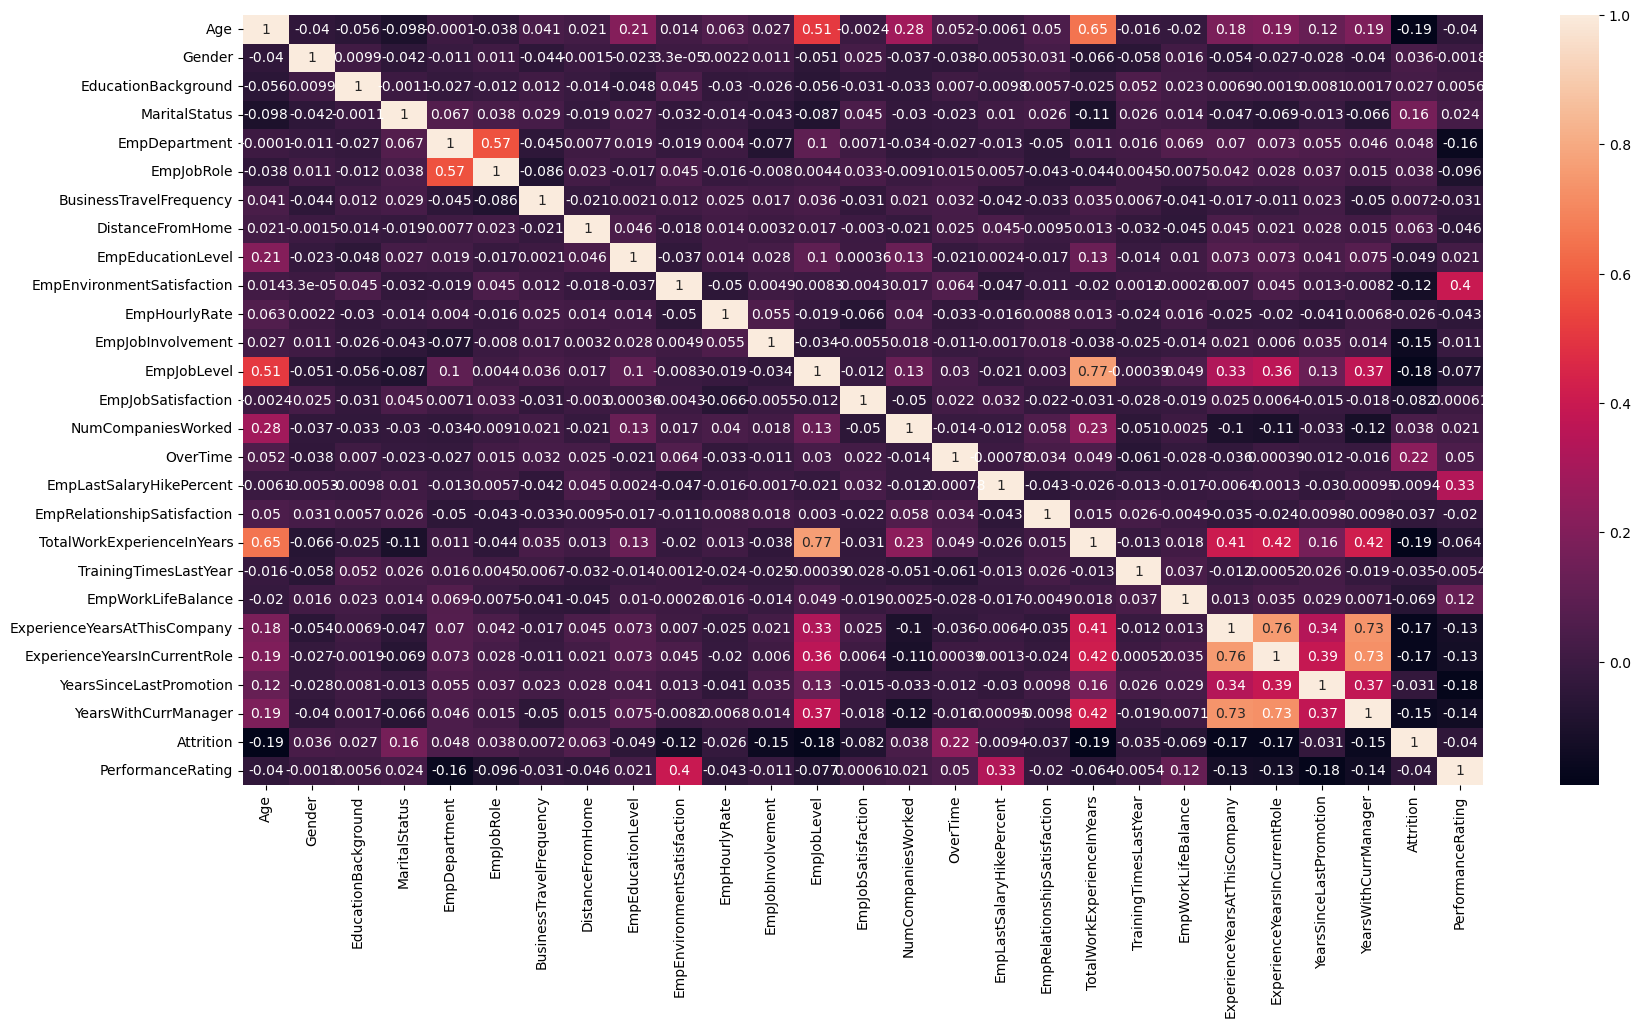

In [101]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [102]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                        10.0   
1                            4                        20.0   
2                            3                        20.0   
3                            2                        23.0   
4                            4                        10.0   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                             5   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                           7.0                        0   
1                           7.0                        1   
2                          13.0                        1   
3                           6.0                        1   
4                           2.0                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                   8.0          0                  3  
1                   7.0          0                  3  
2                  12.0          0                  4  
3                   6.0          0                  3  
4                   2.0          0                  3

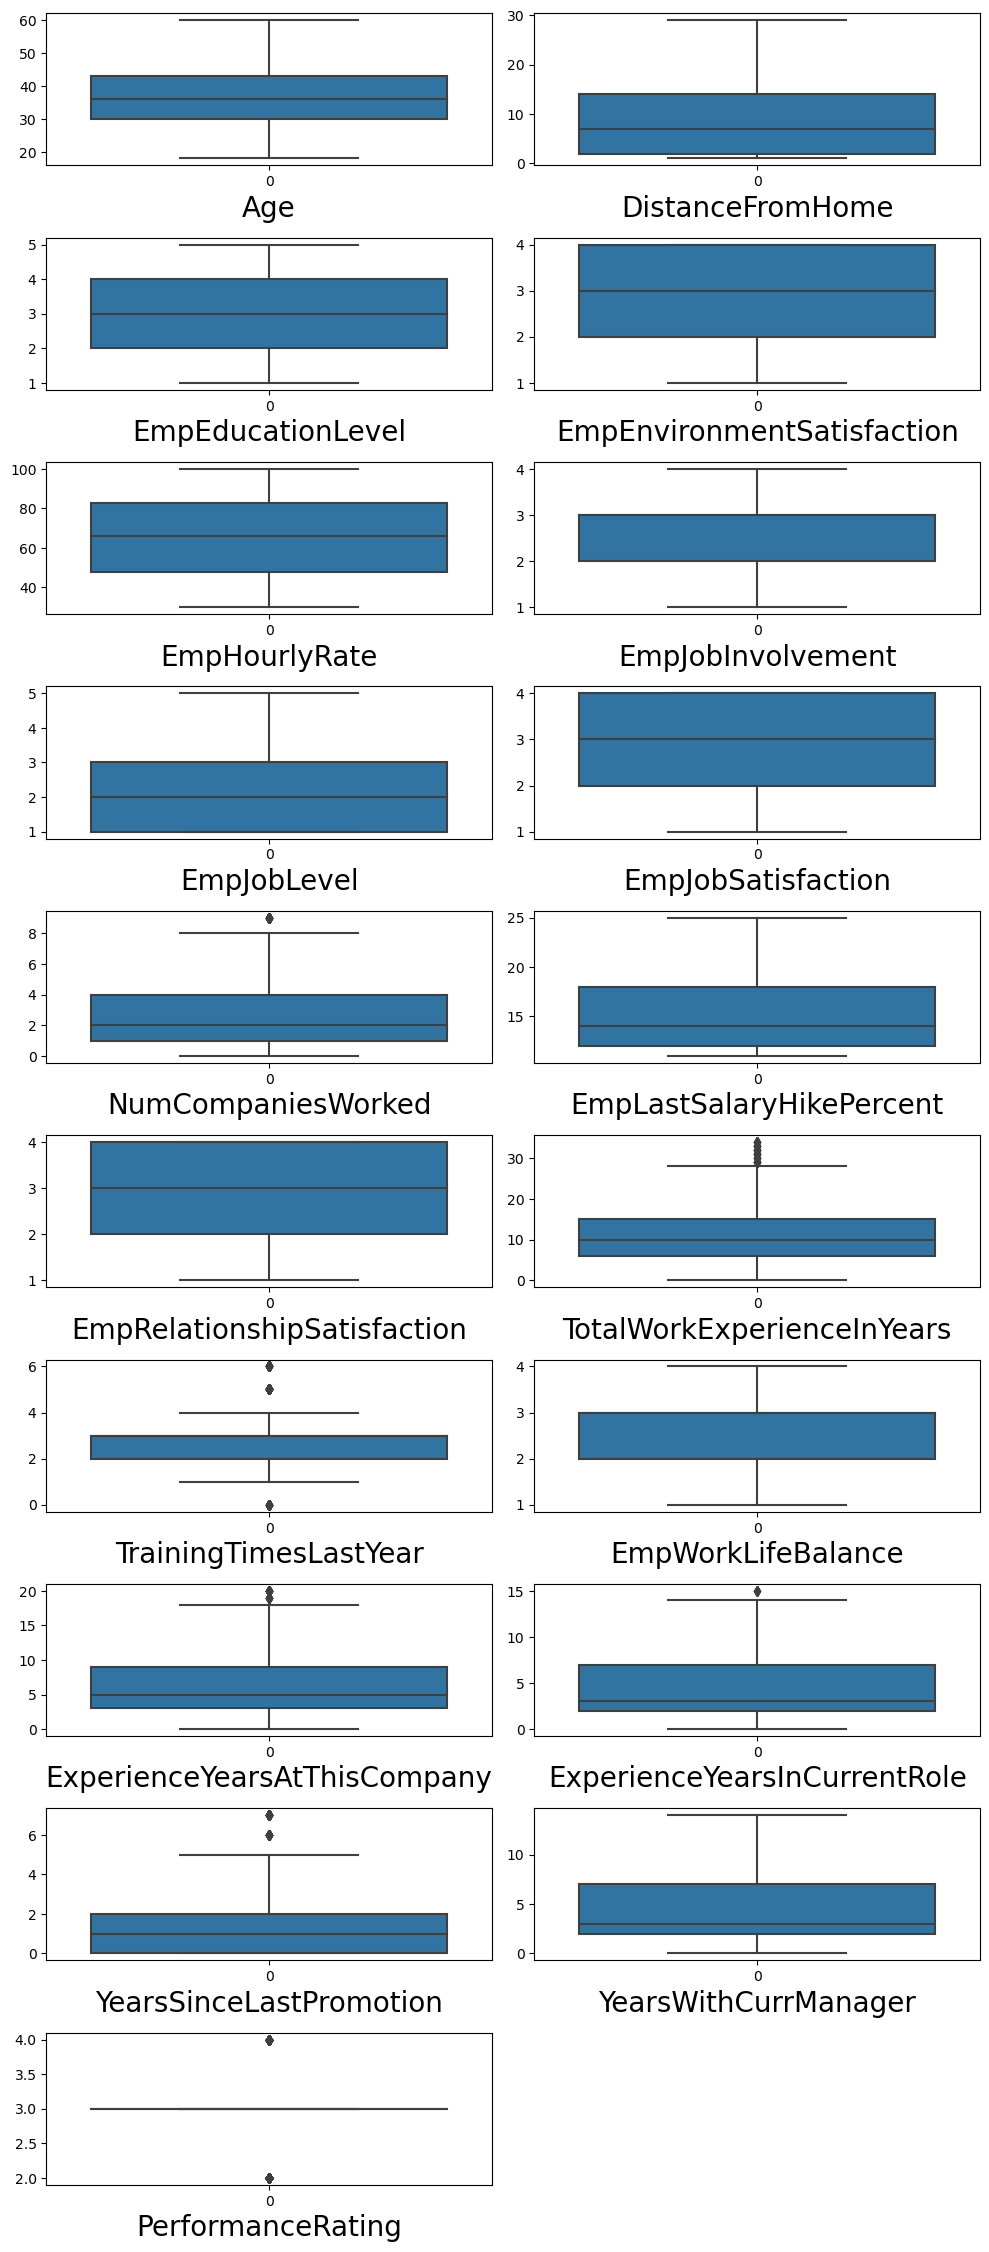

In [103]:
#rechecking outliers
plt.figure(figsize=(10,40))
plotnumber=1
for column in numerical_feature:
    if plotnumber<=28:
        ax=plt.subplot(18,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [104]:
# checking duplicate value
data.duplicated().sum()

0

In [105]:
#droping unique feature and YearsSinceLastPromotion beacuse we have transformed this feature
data.drop(['YearsSinceLastPromotion'],axis=1,inplace=True)

In [106]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                        10.0   
1                            4                        20.0   
2                            3                        20.0   
3                            2                        23.0   
4                            4                        10.0   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                             5   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsWithCurrManager  Attrition  \
0                           7.0                   8.0          0   
1                           7.0                   7.0          0   
2                          13.0                  12.0          0   
3                           6.0                   6.0          0   
4                           2.0                   2.0          0   

   PerformanceRating  
0                  3  
1                  3  
2                  4  
3                  3  
4                  3

In [107]:
data.shape

(1200, 26)

# Split training & testing data

In [116]:
X = data.drop('PerformanceRating', axis=1)  # Drop the target variable
y = data['PerformanceRating']

In [117]:
data.PerformanceRating.value_counts()

3    874
2    194
4    132
Name: PerformanceRating, dtype: int64

In [118]:
from collections import Counter
from imblearn.over_sampling import SMOTE #SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


Now,target feature is balance

# Splitting into train and test

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=10)

# Model Creation,prediction & Evaluation

# Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
lg=LogisticRegression(multi_class='ovr')
lg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [121]:
y_pre=lg.predict(X_train)
y_p=lg.predict(X_test)

In [122]:
cr=classification_report(y_test,y_p)
print(cr)

              precision    recall  f1-score   support

           2       0.85      0.85      0.85       255
           3       0.82      0.76      0.79       267
           4       0.85      0.90      0.87       265

    accuracy                           0.84       787
   macro avg       0.84      0.84      0.84       787
weighted avg       0.84      0.84      0.84       787



In [123]:
c=classification_report(y_train,y_pre)
print(c)

              precision    recall  f1-score   support

           2       0.80      0.83      0.82       619
           3       0.82      0.76      0.79       607
           4       0.82      0.85      0.84       609

    accuracy                           0.81      1835
   macro avg       0.81      0.81      0.81      1835
weighted avg       0.81      0.81      0.81      1835



In [124]:
# testing score
f1score=f1_score(y_test,y_p,average='weighted')
f1score

0.8377259944033145

In [125]:
#training score
f1score=f1_score(y_train,y_pre,average='weighted')
f1score

0.8136799602634702

In [126]:
pd.crosstab(y_test,y_p)

col_0                2    3    4
PerformanceRating               
2                  218   27   10
3                   30  204   33
4                    9   18  238

# Support vector Machine

In [127]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel="poly") ## base model with default parameters (default kernel: rbf)
svclassifier.fit(X_train, y_train)

SVC(kernel='poly')

In [128]:
# Predict output for X_test & X_train
y_hat=svclassifier.predict(X_test)
y_h=svclassifier.predict(X_train)

In [129]:
## testing score
acc=accuracy_score(y_test,y_hat)
acc

0.7928843710292249

In [130]:
# training score
acc=accuracy_score(y_train,y_h)
acc

0.7869209809264305

In [131]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives 
# are used to predict the metrics of a classification report 

print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.77      0.82      0.80       255
           3       0.81      0.69      0.75       267
           4       0.80      0.86      0.83       265

    accuracy                           0.79       787
   macro avg       0.79      0.79      0.79       787
weighted avg       0.79      0.79      0.79       787



In [132]:
print(classification_report(y_train,y_h))

              precision    recall  f1-score   support

           2       0.76      0.87      0.81       619
           3       0.82      0.64      0.72       607
           4       0.79      0.84      0.82       609

    accuracy                           0.79      1835
   macro avg       0.79      0.79      0.78      1835
weighted avg       0.79      0.79      0.78      1835



# Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree

dt=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf= 1, min_samples_split= 3, splitter= 'random')#object creation for decision tree  
dt.fit(X_train,y_train)#training the model
y_hat=dt.predict(X_test)#prediction
y_hat#predicted values 

array([2, 2, 2, 3, 2, 3, 3, 4, 3, 4, 2, 4, 4, 2, 2, 4, 4, 3, 3, 3, 3, 2,
       3, 2, 3, 4, 2, 2, 3, 4, 4, 3, 4, 3, 2, 2, 4, 2, 4, 3, 4, 3, 2, 4,
       3, 2, 4, 2, 3, 3, 4, 3, 2, 3, 2, 4, 4, 4, 2, 3, 3, 2, 4, 4, 3, 2,
       3, 4, 2, 4, 4, 4, 4, 4, 3, 2, 4, 2, 4, 4, 2, 4, 3, 2, 3, 4, 2, 4,
       2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 4, 3, 2, 3, 3, 2, 3, 2,
       2, 4, 3, 2, 2, 3, 3, 2, 4, 4, 3, 2, 2, 4, 4, 3, 4, 2, 2, 4, 3, 4,
       4, 2, 4, 4, 3, 2, 3, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 3, 3, 4, 3,
       4, 4, 2, 2, 3, 3, 3, 3, 2, 2, 2, 4, 2, 4, 2, 4, 3, 2, 4, 2, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 2, 2, 3, 3, 4, 4, 4, 2, 4, 2, 2, 3, 4, 2, 3,
       4, 2, 4, 4, 4, 2, 3, 2, 4, 4, 4, 3, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3,
       2, 4, 4, 4, 2, 4, 3, 2, 2, 2, 2, 2, 3, 4, 3, 3, 2, 2, 4, 3, 4, 4,
       2, 2, 4, 3, 4, 2, 3, 2, 2, 4, 4, 4, 4, 2, 2, 3, 3, 4, 4, 4, 3, 4,
       2, 2, 3, 3, 3, 4, 2, 2, 3, 3, 4, 2, 3, 2, 4, 3, 4, 2, 3, 2, 4, 4,
       2, 4, 3, 3, 3, 2, 4, 2, 2, 4, 3, 4, 4, 4, 4,

In [134]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score    #importing mertics to check model performance
##Training score
y_train_predict=dt.predict(X_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y_train,y_train_predict)#checking accuracy
acc_train

0.979291553133515

In [135]:
print(classification_report(y_train,y_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       619
           3       0.98      0.96      0.97       607
           4       0.98      0.99      0.98       609

    accuracy                           0.98      1835
   macro avg       0.98      0.98      0.98      1835
weighted avg       0.98      0.98      0.98      1835



In [136]:
pd.crosstab(y_train,y_train_predict)#training accuracy

col_0                2    3    4
PerformanceRating               
2                  611    4    4
3                   13  585    9
4                    3    5  601

In [137]:
## test acc
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.8767471410419314

# Random ForestClassifier

In [139]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_train,y_train)#training the data  # 100 estimators means 100 base learners

RandomForestClassifier()

In [140]:
y_predict=rf_clf.predict(X_test)#testing
y_pre=rf_clf.predict(X_train)

In [141]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.91      0.97      0.94       255
           3       0.95      0.91      0.93       267
           4       0.98      0.96      0.97       265

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [142]:
print(classification_report(y_train,y_pre))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       619
           3       1.00      1.00      1.00       607
           4       1.00      1.00      1.00       609

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



# Hyperparameter tuning

In [143]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.


#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)




rf_cv.fit(X_train, y_train)                                  ##training data on randomsearch cv
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")                  ##printing  best parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 1800, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80})


In [144]:
#passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators=1800 , min_samples_split=5 , min_samples_leaf=4 , 
                                 max_features= 'sqrt' , max_depth= 80)



rf_clf2.fit(X_train, y_train)

y_predict=rf_clf2.predict(X_test)

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.89      0.95      0.92       255
           3       0.92      0.90      0.91       267
           4       0.97      0.93      0.95       265

    accuracy                           0.93       787
   macro avg       0.93      0.93      0.93       787
weighted avg       0.93      0.93      0.93       787



In [145]:
y_pred=rf_clf2.predict(X_train)

In [153]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97       619
           3       0.97      0.95      0.96       607
           4       0.99      0.97      0.98       609

    accuracy                           0.97      1835
   macro avg       0.97      0.97      0.97      1835
weighted avg       0.97      0.97      0.97      1835

